# PROBLEM STATEMENT
**The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.**

**Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.**

**You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.**

The evaluation metric for this hackathon is Accuracy Score.

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, ensemble
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import datetime as dt
from sklearn import  metrics   
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# DATA INPUT

In [2]:

train=pd.read_csv('../input/av-janatahack-machine-learning-in-agriculture/train_yaOffsB.csv')
test=pd.read_csv('../input/av-janatahack-machine-learning-in-agriculture/test_pFkWwen.csv')

In [3]:
train['dataset']='train'
test['dataset']='test'

In [4]:
final=pd.concat([train,test])

In [5]:
final['dataset'].value_counts()

train    88858
test     59310
Name: dataset, dtype: int64

# EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
sns.set_style('whitegrid')

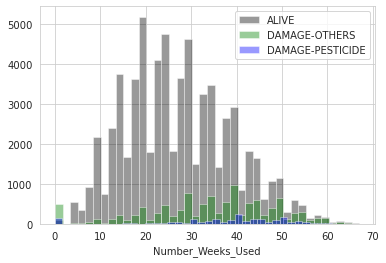

In [7]:
# Number_Weeks_Used
sns.distplot(final[final['Crop_Damage']==0]['Number_Weeks_Used'],bins=40,color='black',kde=False)
sns.distplot(final[final['Crop_Damage']==1]['Number_Weeks_Used'],bins=40,color='green',kde=False)
sns.distplot(final[final['Crop_Damage']==2]['Number_Weeks_Used'],bins=40,color='blue',kde=False)
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

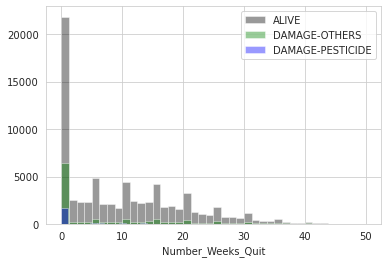

In [8]:
#Number_Weeks_Quit
sns.distplot(final[final['Crop_Damage']==0]['Number_Weeks_Quit'],bins=40,color='black',kde=False)
sns.distplot(final[final['Crop_Damage']==1]['Number_Weeks_Quit'],bins=40,color='green',kde=False)
sns.distplot(final[final['Crop_Damage']==2]['Number_Weeks_Quit'],bins=40,color='blue',kde=False)
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

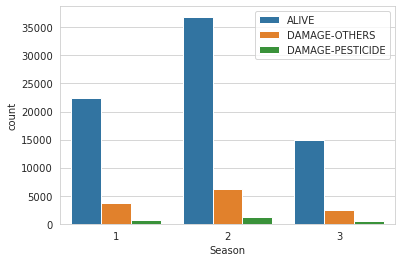

In [9]:
# Season
sns.countplot(x='Season',data=final,hue='Crop_Damage')
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

In [10]:
df = final[final['dataset']=='train'].groupby(['Season', 'Crop_Damage']).agg({'Crop_Damage': 'count'})
percentage = df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
df, percentage

(                    Crop_Damage
 Season Crop_Damage             
 1      0.0                22493
        1.0                 3748
        2.0                  661
 2      0.0                36881
        1.0                 6115
        2.0                 1214
 3      0.0                14864
        1.0                 2444
        2.0                  438,
                     Crop_Damage
 Season Crop_Damage             
 1      0.0                83.61
        1.0                13.93
        2.0                 2.46
 2      0.0                83.42
        1.0                13.83
        2.0                 2.75
 3      0.0                83.76
        1.0                13.77
        2.0                 2.47)

*Seasons dont have much effect in survival percentage rate*

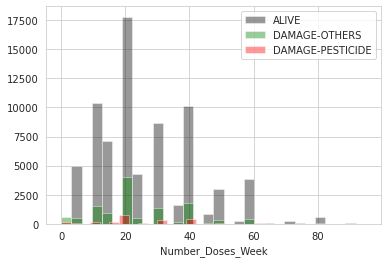

In [11]:
# Number_Doses_Week
sns.distplot(final[final['Crop_Damage']==0]['Number_Doses_Week'],bins=30,color='black',kde=False)
sns.distplot(final[final['Crop_Damage']==1]['Number_Doses_Week'],bins=30,color='green',kde=False)
sns.distplot(final[final['Crop_Damage']==2]['Number_Doses_Week'],bins=30,color='red',kde=False)
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

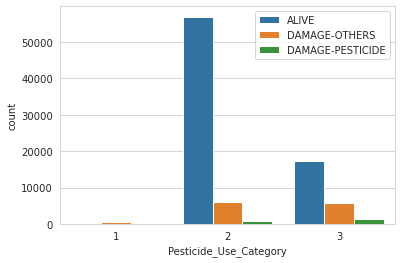

In [12]:
#Pesticide_Use_Category
sns.countplot(x='Pesticide_Use_Category',data=final,hue='Crop_Damage')
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

In [13]:
df = final[final['dataset']=='train'].groupby(['Pesticide_Use_Category', 'Crop_Damage']).agg({'Crop_Damage': 'count'})
percentage = df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
df,percentage

(                                    Crop_Damage
 Pesticide_Use_Category Crop_Damage             
 1                      0.0                  118
                        1.0                  554
                        2.0                  165
 2                      0.0                56958
                        1.0                 6072
                        2.0                  679
 3                      0.0                17162
                        1.0                 5681
                        2.0                 1469,
                                     Crop_Damage
 Pesticide_Use_Category Crop_Damage             
 1                      0.0                14.10
                        1.0                66.19
                        2.0                19.71
 2                      0.0                89.40
                        1.0                 9.53
                        2.0                 1.07
 3                      0.0                70.59
                   

*Among pesticide categories, category 2(previously used) has highest Survival rate*

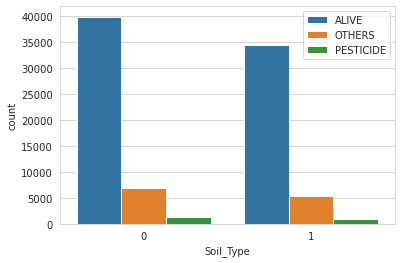

In [14]:
#Soil_Type
sns.countplot(x='Soil_Type',data=final,hue='Crop_Damage')
plt.legend(labels=['ALIVE', 'OTHERS', 'PESTICIDE'])

In [15]:
df = final[final['dataset']=='train'].groupby(['Soil_Type', 'Crop_Damage']).agg({'Crop_Damage': 'count'})
percentage = df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
df, percentage

(                       Crop_Damage
 Soil_Type Crop_Damage             
 0         0.0                39841
           1.0                 6953
           2.0                 1330
 1         0.0                34397
           1.0                 5354
           2.0                  983,
                        Crop_Damage
 Soil_Type Crop_Damage             
 0         0.0                82.79
           1.0                14.45
           2.0                 2.76
 1         0.0                84.44
           1.0                13.14
           2.0                 2.41)

*Soil Type1 has slightly higher survival rate than Type0*

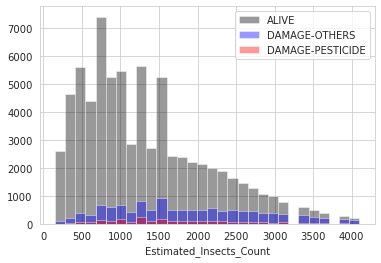

In [16]:
#Estimated_Insects_Count
sns.distplot(final[final['Crop_Damage']==0]['Estimated_Insects_Count'],bins=30,color='black',kde=False)
sns.distplot(final[final['Crop_Damage']==1]['Estimated_Insects_Count'],bins=30,color='blue',kde=False)
sns.distplot(final[final['Crop_Damage']==2]['Estimated_Insects_Count'],bins=30,color='red',kde=False)
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

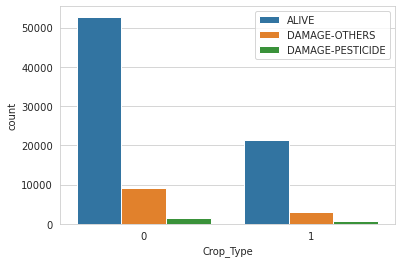

In [17]:
#Crop_Type
sns.countplot(x='Crop_Type',data=final,hue='Crop_Damage')
plt.legend(labels=['ALIVE', 'DAMAGE-OTHERS', 'DAMAGE-PESTICIDE'])

In [18]:
df = final[final['dataset']=='train'].groupby(['Crop_Type', 'Crop_Damage']).agg({'Crop_Damage': 'count'})
percentage = df.groupby(level=0).apply(lambda x:round(100 * x / x.sum(),2))
df, percentage

(                       Crop_Damage
 Crop_Type Crop_Damage             
 0         0.0                52778
           1.0                 9204
           2.0                 1607
 1         0.0                21460
           1.0                 3103
           2.0                  706,
                        Crop_Damage
 Crop_Type Crop_Damage             
 0         0.0                83.00
           1.0                14.47
           2.0                 2.53
 1         0.0                84.93
           1.0                12.28
           2.0                 2.79)

*Crop Type1 has slightly more survival percentage rate than Type0*

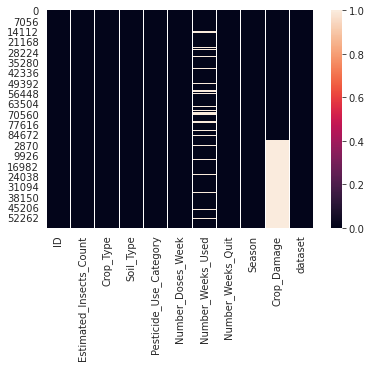

In [19]:
sns.heatmap(final.isna())

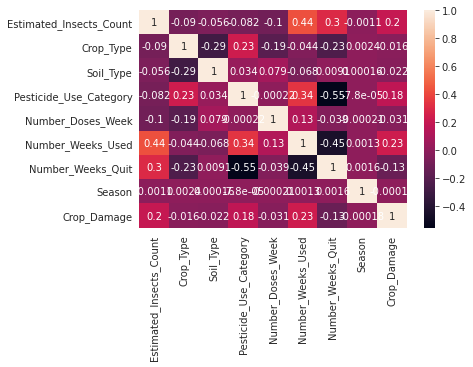

In [20]:
sns.heatmap(final.corr(),annot=True)

*Feature Estimated_Insects_Count has good correlation with Number_Weeks_Used*

# FEATURE ENGINEERING

In [21]:
# Imputing missing Values
final.fillna(-1, inplace=True)

In [22]:
final['Uniq_crops_per_season']=final.groupby(['Season'])['ID'].transform('nunique')

final['Uniq_crops_per_soil']=final.groupby(['Soil_Type'])['ID'].transform('nunique')

final['Uniq_crops_per_pesticide']=final.groupby(['Pesticide_Use_Category'])['ID'].transform('nunique')

final['Uniq_crops_per_CT']=final.groupby(['Crop_Type'])['ID'].transform('nunique')

final['Crop_Type'] = final['Crop_Type'].astype('category')
#final['Crop_Type'].value_counts()

final['Soil_Type'] = final['Soil_Type'].astype('category')
#final['Soil_Type'].value_counts()

final['Pesticide_Use_Category']=final['Pesticide_Use_Category'].astype('category')
#final['Pesticide_Use_Category'].value_counts()

final['Season']=final['Season'].astype('category')
#final['Season'].value_counts()

final['Uniq_crops_per_season'] = final['Uniq_crops_per_season'].astype('category')
#final['Uniq_crops_per_season'].value_counts()

final['Uniq_crops_per_soil'] = final['Uniq_crops_per_soil'].astype('category')
#final['Uniq_crops_per_soil'].value_counts()

final['Uniq_crops_per_pesticide']=final['Uniq_crops_per_pesticide'].astype('category')
#final['Uniq_crops_per_pesticide'].value_counts()

final['Uniq_crops_per_CT']=final['Uniq_crops_per_CT'].astype('category')
#final['Uniq_crops_per_CT'].value_counts()


# Train Test Split

In [23]:
train, test = final[final.dataset == 'train'], final[final.dataset == 'test']
train.drop(['dataset'], inplace=True, axis=1)
test.drop(['dataset'], inplace=True, axis=1)
test.drop(['Crop_Damage'], inplace=True, axis=1)
train.shape, test.shape

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((88858, 14), (59310, 13))

In [24]:
train.drop(['ID'], axis=1, inplace=True)
test_id=test['ID']
test.drop(['ID'], axis=1, inplace=True)
test_id

0        F00000002
1        F00000007
2        F00000011
3        F00000013
4        F00000014
           ...    
59305    F00155937
59306    F00155940
59307    F00155941
59308    F00155943
59309    F00155944
Name: ID, Length: 59310, dtype: object

In [25]:
y=train['Crop_Damage']
train.drop(['Crop_Damage'], axis=1, inplace=True)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(train, y,test_size=0.20,random_state=0,
                                                    stratify=y)

# FITTING MODEL AND MAKING PREDICTION ON TEST

In [27]:
params = {}
params['learning_rate'] = 0.04
#params['min_child_samples'] = 40
params['max_depth'] = 18
params['n_estimators'] = 1000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}

In [28]:
from lightgbm import LGBMClassifier
predictors=train.columns
clf = LGBMClassifier(**params)

clf.fit(x_train[predictors], y_train, eval_set=[(x_test, y_test)], verbose=50,
        eval_metric = 'multi_error', early_stopping_rounds = 100)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_error: 0.156651	valid_0's multi_logloss: 0.42754
[100]	valid_0's multi_error: 0.152768	valid_0's multi_logloss: 0.419176
[150]	valid_0's multi_error: 0.151193	valid_0's multi_logloss: 0.417553
[200]	valid_0's multi_error: 0.150574	valid_0's multi_logloss: 0.417048
[250]	valid_0's multi_error: 0.150743	valid_0's multi_logloss: 0.416865
[300]	valid_0's multi_error: 0.15063	valid_0's multi_logloss: 0.41677
Early stopping, best iteration is:
[206]	valid_0's multi_error: 0.150349	valid_0's multi_logloss: 0.417022


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.04, max_depth=18,
               min_data_in_leaf=55, n_estimators=1000, objective='multiclass',
               random_state=42, reg_alpha=1.7, reg_lambda=1.11, subsample=0.7)

In [29]:
# Finding best iteration 
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
params

{'learning_rate': 0.04,
 'max_depth': 18,
 'n_estimators': 206,
 'objective': 'multiclass',
 'boosting_type': 'gbdt',
 'subsample': 0.7,
 'random_state': 42,
 'colsample_bytree': 0.7,
 'min_data_in_leaf': 55,
 'reg_alpha': 1.7,
 'reg_lambda': 1.11}

In [30]:
clf = LGBMClassifier(**params)

clf.fit(train[predictors], y, eval_metric='multi_error', verbose=False, categorical_feature='auto')

# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(y, clf.predict(train[predictors]))

print('ACC: {}'.format(eval_score_acc))

ACC: 0.8489612640392536


In [31]:
preds = clf.predict(test)
pred=pd.Series(preds)

In [32]:
submission = pd.DataFrame({'ID':test_id, 'Crop_Damage':preds})

# FEATURE IMPORTANCE

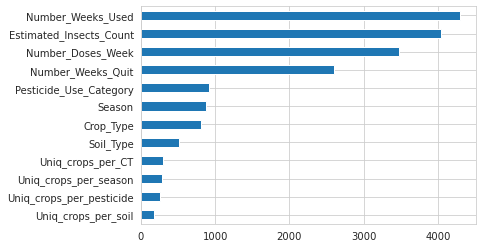

In [33]:
fi = pd.Series(index = predictors, data = clf.feature_importances_)
fi.sort_values(ascending=False)[0:20][::-1].plot(kind = 'barh')